In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string 
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
ar=pd.read_csv('reviews.csv')

In [3]:
ar.head()

,Unnamed: 0,stars,Comment,Customer Name
0,0,3.0 out of 5 stars,"Phones been amazingI have used iphone 4s , 5 ,...",Yaswanth S.
1,1,5.0 out of 5 stars,"SUMMERY: As a first time iPhone user, I would ...",Avnish Chandra
2,2,4.0 out of 5 stars,Worth spending money on this product.No regret...,Abhishek
3,3,5.0 out of 5 stars,"Some setting of IOS 16 are very good, and you ...",Anmol
4,4,5.0 out of 5 stars,I purchased iphone 12 in great Indian festival...,Ankur p.


In [4]:
ar.tail()

,Unnamed: 0,stars,Comment,Customer Name
5,5,5.0 out of 5 stars,"With soo many innovations in Iphone series, i ...",Aben Thomas
6,6,4.0 out of 5 stars,Face scan unlock is perfect,Swapnil S Joshi
7,7,4.0 out of 5 stars,"This is not the first iPhone, so nothing more ...",Jayan
8,8,4.0 out of 5 stars,"Switched to IOS for the first time, was really...",Manjula
9,9,5.0 out of 5 stars,"Phone came after 7 days, with amazon sealed pa...",Dibyojyoti Samanta


In [5]:
ar.drop(['Unnamed: 0'],inplace=True,axis=1)

In [6]:
ar.describe()

,stars,Comment,Customer Name
count,10,10,10
unique,3,10,10
top,5.0 out of 5 stars,"Phones been amazingI have used iphone 4s , 5 ,...",Yaswanth S.
freq,5,1,1


In [7]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   stars          10 non-null     object
 1   Comment        10 non-null     object
 2   Customer Name  10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


In [8]:
ar.shape

(10, 3)

In [9]:
ar.isna().sum()

stars            0
Comment          0
Customer Name    0
dtype: int64

In [10]:
ar.isnull().sum()

stars            0
Comment          0
Customer Name    0
dtype: int64

In [11]:
reviews=[comment.strip() for comment in ar.Comment]
reviews=[comment for comment in reviews if comment]
reviews[0:10]


['Phones been amazingI have used iphone 4s , 5 , 6s and xr but I liked it.Long battery life, not quite as good as iPhone 13 but Close. Plus I didn’t like the weight and thickness of iPhone 13  just to get maybe 45-60 minutes more time at the most. I don’t see any difference in speed between Bionic14 and Bionic 15 what so ever. And to much hype for the 120 h refresh rate, no noticeable difference at all. Also I actually think iPhone 12 pictures look better than iPhone 13 because by supposedly having slight bit more detail they over saturate the black in them. Love the thin weightless feel in iPhone 12 and have had zero issues. I’m keeping this phone till the wheels fall off. Great value.',
 'SUMMERY: As a first time iPhone user, I would say one should definitely buy iPhone ONLY for premium built & premium hardware (will talk later) while the whole iOS experience is pretty overrated. iPhones isn\'t any exceptionally fast with normal apps like YouTube, Insta etc, Android phones are equall

In [12]:
reviews_text=' '.join(reviews)
reviews_text

'Phones been amazingI have used iphone 4s , 5 , 6s and xr but I liked it.Long battery life, not quite as good as iPhone 13 but Close. Plus I didn’t like the weight and thickness of iPhone 13  just to get maybe 45-60 minutes more time at the most. I don’t see any difference in speed between Bionic14 and Bionic 15 what so ever. And to much hype for the 120 h refresh rate, no noticeable difference at all. Also I actually think iPhone 12 pictures look better than iPhone 13 because by supposedly having slight bit more detail they over saturate the black in them. Love the thin weightless feel in iPhone 12 and have had zero issues. I’m keeping this phone till the wheels fall off. Great value. SUMMERY: As a first time iPhone user, I would say one should definitely buy iPhone ONLY for premium built & premium hardware (will talk later) while the whole iOS experience is pretty overrated. iPhones isn\'t any exceptionally fast with normal apps like YouTube, Insta etc, Android phones are equally sna

In [13]:
no_punch_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punch_text

'Phones been amazingI have used iphone 4s  5  6s and xr but I liked itLong battery life not quite as good as iPhone 13 but Close Plus I didn’t like the weight and thickness of iPhone 13  just to get maybe 4560 minutes more time at the most I don’t see any difference in speed between Bionic14 and Bionic 15 what so ever And to much hype for the 120 h refresh rate no noticeable difference at all Also I actually think iPhone 12 pictures look better than iPhone 13 because by supposedly having slight bit more detail they over saturate the black in them Love the thin weightless feel in iPhone 12 and have had zero issues I’m keeping this phone till the wheels fall off Great value SUMMERY As a first time iPhone user I would say one should definitely buy iPhone ONLY for premium built  premium hardware will talk later while the whole iOS experience is pretty overrated iPhones isnt any exceptionally fast with normal apps like YouTube Insta etc Android phones are equally snappy with them in 2022PRO

In [17]:
import re
no_url_text=re.sub(r'http/S+','',no_punch_text)
no_url_text

'Phones been amazingI have used iphone 4s  5  6s and xr but I liked itLong battery life not quite as good as iPhone 13 but Close Plus I didn’t like the weight and thickness of iPhone 13  just to get maybe 4560 minutes more time at the most I don’t see any difference in speed between Bionic14 and Bionic 15 what so ever And to much hype for the 120 h refresh rate no noticeable difference at all Also I actually think iPhone 12 pictures look better than iPhone 13 because by supposedly having slight bit more detail they over saturate the black in them Love the thin weightless feel in iPhone 12 and have had zero issues I’m keeping this phone till the wheels fall off Great value SUMMERY As a first time iPhone user I would say one should definitely buy iPhone ONLY for premium built  premium hardware will talk later while the whole iOS experience is pretty overrated iPhones isnt any exceptionally fast with normal apps like YouTube Insta etc Android phones are equally snappy with them in 2022PRO

In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens[0:50])

['Phones', 'been', 'amazingI', 'have', 'used', 'iphone', '4s', '5', '6s', 'and', 'xr', 'but', 'I', 'liked', 'itLong', 'battery', 'life', 'not', 'quite', 'as', 'good', 'as', 'iPhone', '13', 'but', 'Close', 'Plus', 'I', 'didn', '’', 't', 'like', 'the', 'weight', 'and', 'thickness', 'of', 'iPhone', '13', 'just', 'to', 'get', 'maybe', '4560', 'minutes', 'more', 'time', 'at', 'the', 'most']


In [23]:
len(text_tokens)

1100

In [28]:
from nltk.corpus import stopwords
my_sw=stopwords.words('english')

sw_list=['I','A','THE','IT']
my_sw.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_sw]
print(no_stop_tokens)

['Phones', 'amazingI', 'used', 'iphone', '4s', '5', '6s', 'xr', 'liked', 'itLong', 'battery', 'life', 'quite', 'good', 'iPhone', '13', 'Close', 'Plus', '’', 'like', 'weight', 'thickness', 'iPhone', '13', 'get', 'maybe', '4560', 'minutes', 'time', '’', 'see', 'difference', 'speed', 'Bionic14', 'Bionic', '15', 'ever', 'And', 'much', 'hype', '120', 'h', 'refresh', 'rate', 'noticeable', 'difference', 'Also', 'actually', 'think', 'iPhone', '12', 'pictures', 'look', 'better', 'iPhone', '13', 'supposedly', 'slight', 'bit', 'detail', 'saturate', 'black', 'Love', 'thin', 'weightless', 'feel', 'iPhone', '12', 'zero', 'issues', '’', 'keeping', 'phone', 'till', 'wheels', 'fall', 'Great', 'value', 'SUMMERY', 'As', 'first', 'time', 'iPhone', 'user', 'would', 'say', 'one', 'definitely', 'buy', 'iPhone', 'ONLY', 'premium', 'built', 'premium', 'hardware', 'talk', 'later', 'whole', 'iOS', 'experience', 'pretty', 'overrated', 'iPhones', 'isnt', 'exceptionally', 'fast', 'normal', 'apps', 'like', 'YouTube'

In [30]:
lower_words=[comments.lower() for comments in no_stop_tokens]
lower_words

['phones',
 'amazingi',
 'used',
 'iphone',
 '4s',
 '5',
 '6s',
 'xr',
 'liked',
 'itlong',
 'battery',
 'life',
 'quite',
 'good',
 'iphone',
 '13',
 'close',
 'plus',
 '’',
 'like',
 'weight',
 'thickness',
 'iphone',
 '13',
 'get',
 'maybe',
 '4560',
 'minutes',
 'time',
 '’',
 'see',
 'difference',
 'speed',
 'bionic14',
 'bionic',
 '15',
 'ever',
 'and',
 'much',
 'hype',
 '120',
 'h',
 'refresh',
 'rate',
 'noticeable',
 'difference',
 'also',
 'actually',
 'think',
 'iphone',
 '12',
 'pictures',
 'look',
 'better',
 'iphone',
 '13',
 'supposedly',
 'slight',
 'bit',
 'detail',
 'saturate',
 'black',
 'love',
 'thin',
 'weightless',
 'feel',
 'iphone',
 '12',
 'zero',
 'issues',
 '’',
 'keeping',
 'phone',
 'till',
 'wheels',
 'fall',
 'great',
 'value',
 'summery',
 'as',
 'first',
 'time',
 'iphone',
 'user',
 'would',
 'say',
 'one',
 'definitely',
 'buy',
 'iphone',
 'only',
 'premium',
 'built',
 'premium',
 'hardware',
 'talk',
 'later',
 'whole',
 'ios',
 'experience',
 'p

In [40]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

phones amazingi used iphone 4s 5 6s xr liked itlong battery life quite good iphone 13 close plus ’ like weight thickness iphone 13 get maybe 4560 minutes time ’ see difference speed bionic14 bionic 15 ever and much hype 120 h refresh rate noticeable difference also actually think iphone 12 pictures look better iphone 13 supposedly slight bit detail saturate black love thin weightless feel iphone 12 zero issues ’ keeping phone till wheels fall great value summery as first time iphone user would say one definitely buy iphone only premium built premium hardware talk later whole ios experience pretty overrated iphones isnt exceptionally fast normal apps like youtube insta etc android phones equally snappy 2022pros1 impressive hardware heptics autobrightness otherwise highly ignored things android way perfectly executed iphone does make big difference user experience2 the screen amazing doesnt 90 120 hz refresh rate feels better nord 90 hz3 a14 bionic promises years performance ahead4 batte

In [41]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['phone', 'amazingi', 'use', 'iphone', '4s', '5', '6s', 'xr', 'like', 'itlong', 'battery', 'life', 'quite', 'good', 'iphone', '13', 'close', 'plus', "'", 'like', 'weight', 'thickness', 'iphone', '13', 'get', 'maybe', '4560', 'minute', 'time', "'", 'see', 'difference', 'speed', 'bionic14', 'bionic', '15', 'ever', 'and', 'much', 'hype', '120', 'h', 'refresh', 'rate', 'noticeable', 'difference', 'also', 'actually', 'think', 'iphone', '12', 'picture', 'look', 'well', 'iphone', '13', 'supposedly', 'slight', 'bit', 'detail', 'saturate', 'black', 'love', 'thin', 'weightless', 'feel', 'iphone', '12', 'zero', 'issue', "'", 'keep', 'phone', 'till', 'wheel', 'fall', 'great', 'value', 'summery', 'as', 'first', 'time', 'iphone', 'user', 'would', 'say', 'one', 'definitely', 'buy', 'iphone', 'only', 'premium', 'build', 'premium', 'hardware', 'talk', 'later', 'whole', 'io', 'experience', 'pretty', 'overrated', 'iphone', 'be', 'not', 'exceptionally', 'fast', 'normal', 'app', 'like', 'youtube', 'insta',

In [43]:
clean_reviews=' '.join(lemmas)
clean_reviews

"phone amazingi use iphone 4s 5 6s xr like itlong battery life quite good iphone 13 close plus ' like weight thickness iphone 13 get maybe 4560 minute time ' see difference speed bionic14 bionic 15 ever and much hype 120 h refresh rate noticeable difference also actually think iphone 12 picture look well iphone 13 supposedly slight bit detail saturate black love thin weightless feel iphone 12 zero issue ' keep phone till wheel fall great value summery as first time iphone user would say one definitely buy iphone only premium build premium hardware talk later whole io experience pretty overrated iphone be not exceptionally fast normal app like youtube insta etc android phone equally snappy 2022pros1 impressive hardware heptic autobrightness otherwise highly ignore thing android way perfectly execute iphone do make big difference user experience2 the screen amazing do not 90 120 hz refresh rate feel well nord 90 hz3 a14 bionic promise year performance ahead4 battery life somewhere good g

# Feature Extraction

## Using Countvectorizer

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [50]:
print(cv.vocabulary_)

{'phone': 275, 'amazingi': 36, 'use': 380, 'iphone': 197, '4s': 18, '6s': 23, 'xr': 407, 'like': 218, 'itlong': 201, 'battery': 55, 'life': 216, 'quite': 292, 'good': 156, '13': 3, 'close': 86, 'plus': 278, 'weight': 389, 'thickness': 363, 'get': 155, 'maybe': 230, '4560': 17, 'minute': 237, 'time': 370, 'see': 315, 'difference': 108, 'speed': 339, 'bionic14': 64, 'bionic': 63, '15': 5, 'ever': 125, 'and': 38, 'much': 242, 'hype': 179, '120': 1, 'refresh': 300, 'rate': 294, 'noticeable': 254, 'also': 33, 'actually': 28, 'think': 366, '12': 0, 'picture': 276, 'look': 222, 'well': 393, 'supposedly': 352, 'slight': 324, 'bit': 65, 'detail': 107, 'saturate': 307, 'black': 66, 'love': 225, 'thin': 364, 'weightless': 392, 'feel': 143, 'zero': 413, 'issue': 198, 'keep': 206, 'till': 369, 'wheel': 395, 'fall': 139, 'great': 157, 'value': 384, 'summery': 347, 'as': 48, 'first': 146, 'user': 381, 'would': 404, 'say': 308, 'one': 260, 'definitely': 105, 'buy': 74, 'only': 261, 'premium': 281, 'bu

In [51]:
print(cv.get_feature_names_out()[100:300])

['create' 'customisation' 'cuz' 'day' 'decently' 'definitely' 'degrade'
 'detail' 'difference' 'difficulty' 'dimension' 'do' 'dolby' 'easily'
 'easy' 'effect' 'effectsbuild' 'either' 'end' 'engineer' 'equally'
 'essential' 'etc' 'etc4' 'even' 'ever' 'everything' 'exceptionally'
 'excited' 'exclude' 'execute' 'exhagerate' 'expect' 'expensive'
 'experience' 'experience2' 'explain' 'face' 'faceid' 'fall' 'fanboy'
 'fast' 'feature' 'feel' 'festival' 'fill' 'first' 'flagship'
 'flawlesslycamera' 'fps' 'friendly' 'from' 'game' 'gen' 'gesture' 'get'
 'good' 'great' 'great3' 'great56' 'great8' 'greati' 'greatin' 'group'
 'guess' 'hand' 'handy' 'hardware' 'have' 'hdr' 'health' 'health2'
 'heating' 'help' 'heptic' 'high' 'highly' 'homescreen' 'however' 'hype'
 'hz' 'hz3' 'ideal' 'identify' 'ig' 'ignore' 'impressive' 'in' 'include'
 'indian' 'infingerprint' 'innovation' 'insta' 'instead' 'integrate' 'io'
 'ios' 'iphone' 'issue' 'issuedesign' 'it' 'itlong' 'jealous' 'job' 'jot'
 'just' 'keep' 'kno

In [53]:
print(reviewscv.toarray()[100:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [55]:
print(reviewscv.toarray().shape)

(710, 414)


In [57]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
box_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [58]:
box_matrix_ngram

<710x100 sparse matrix of type '<class 'numpy.int64'>'
	with 357 stored elements in Compressed Sparse Row format>

In [61]:
print(cv_ngram_range.get_feature_names())

['12', '120', '13', '16', '20', '90', 'also', 'amazing', 'and', 'android', 'app', 'apple', 'battery', 'be', 'big', 'bionic', 'build', 'buy', 'camera', 'charge', 'charger', 'clear', 'click', 'commonsense', 'compare', 'day', 'difference', 'do', 'equally', 'etc', 'even', 'expect', 'expensive', 'experience', 'fast', 'feature', 'feel', 'first', 'get', 'good', 'great', 'hardware', 'io', 'iphone', 'issue', 'keep', 'less', 'life', 'light', 'like', 'look', 'love', 'much', 'no', 'not', 'notch', 'notification', 'one', 'open', 'overall', 'perfect', 'performance', 'phone', 'play', 'plus', 'premium', 'pretty', 'purchase', 'quality', 'rate', 'really', 'refresh', 'say', 'series', 'set', 'setting', 'small', 'smooth', 'snappy', 'sometimes', 'soo', 'speed', 'swipe', 'take', 'the', 'there', 'thing', 'till', 'time', 'top', 'use', 'user', 'want', 'way', 'well', 'without', 'worth', 'would', 'yes', 'you']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [62]:
print(box_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [63]:
print(box_matrix_ngram.toarray().shape)

(710, 100)


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidv_ngram_max_features.fit_transform(lemmas)
tfidf_matrix_ngram

<710x414 sparse matrix of type '<class 'numpy.float64'>'
	with 688 stored elements in Compressed Sparse Row format>

In [73]:
print(tfidv_ngram_max_features.get_feature_names())  

['12', '120', '12display', '13', '13rd', '15', '16', '18kprovided', '1st', '20', '2020', '2022pros1', '20w', '2months', '30min', '41500', '455used', '4560', '4s', '55', '5yrsoverall', '60', '65inch', '6s', '90', 'a14', 'access', 'accessories6', 'actually', 'afford', 'ahead4', 'almost', 'along', 'also', 'always', 'amazing', 'amazingi', 'amazon', 'and', 'android', 'androidspeaker', 'anime', 'annoying', 'apex', 'app', 'apple', 'appleface', 'around', 'as', 'atleast', 'audio', 'autobrightness', 'awesome', 'back', 'bad', 'battery', 'batterys', 'be', 'beast', 'believe', 'below1', 'besides', 'big', 'bionic', 'bionic14', 'bit', 'black', 'blotware', 'board', 'box', 'boxwas', 'bubble', 'bug', 'build', 'buy', 'cable', 'camera', 'card', 'cellular', 'charge', 'charger', 'charging', 'check', 'choice', 'clear', 'click', 'close', 'colour', 'come', 'commonsense', 'company', 'compare', 'concern', 'condition', 'constant', 'contain', 'content', 'correct', 'cover', 'crappy', 'create', 'customisation', 'cuz'

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [74]:
print(tfidf_matrix_ngram.toarray())   

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [75]:
print(tfidf_matrix_ngram.toarray().shape)

(710, 414)


In [76]:
def plotcloud(wordcloud):
  plt.figure(figsize=(30,20))
  plt.imshow(wordcloud)
  plt.axis('off')

In [78]:
STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='green',max_words=150,colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)

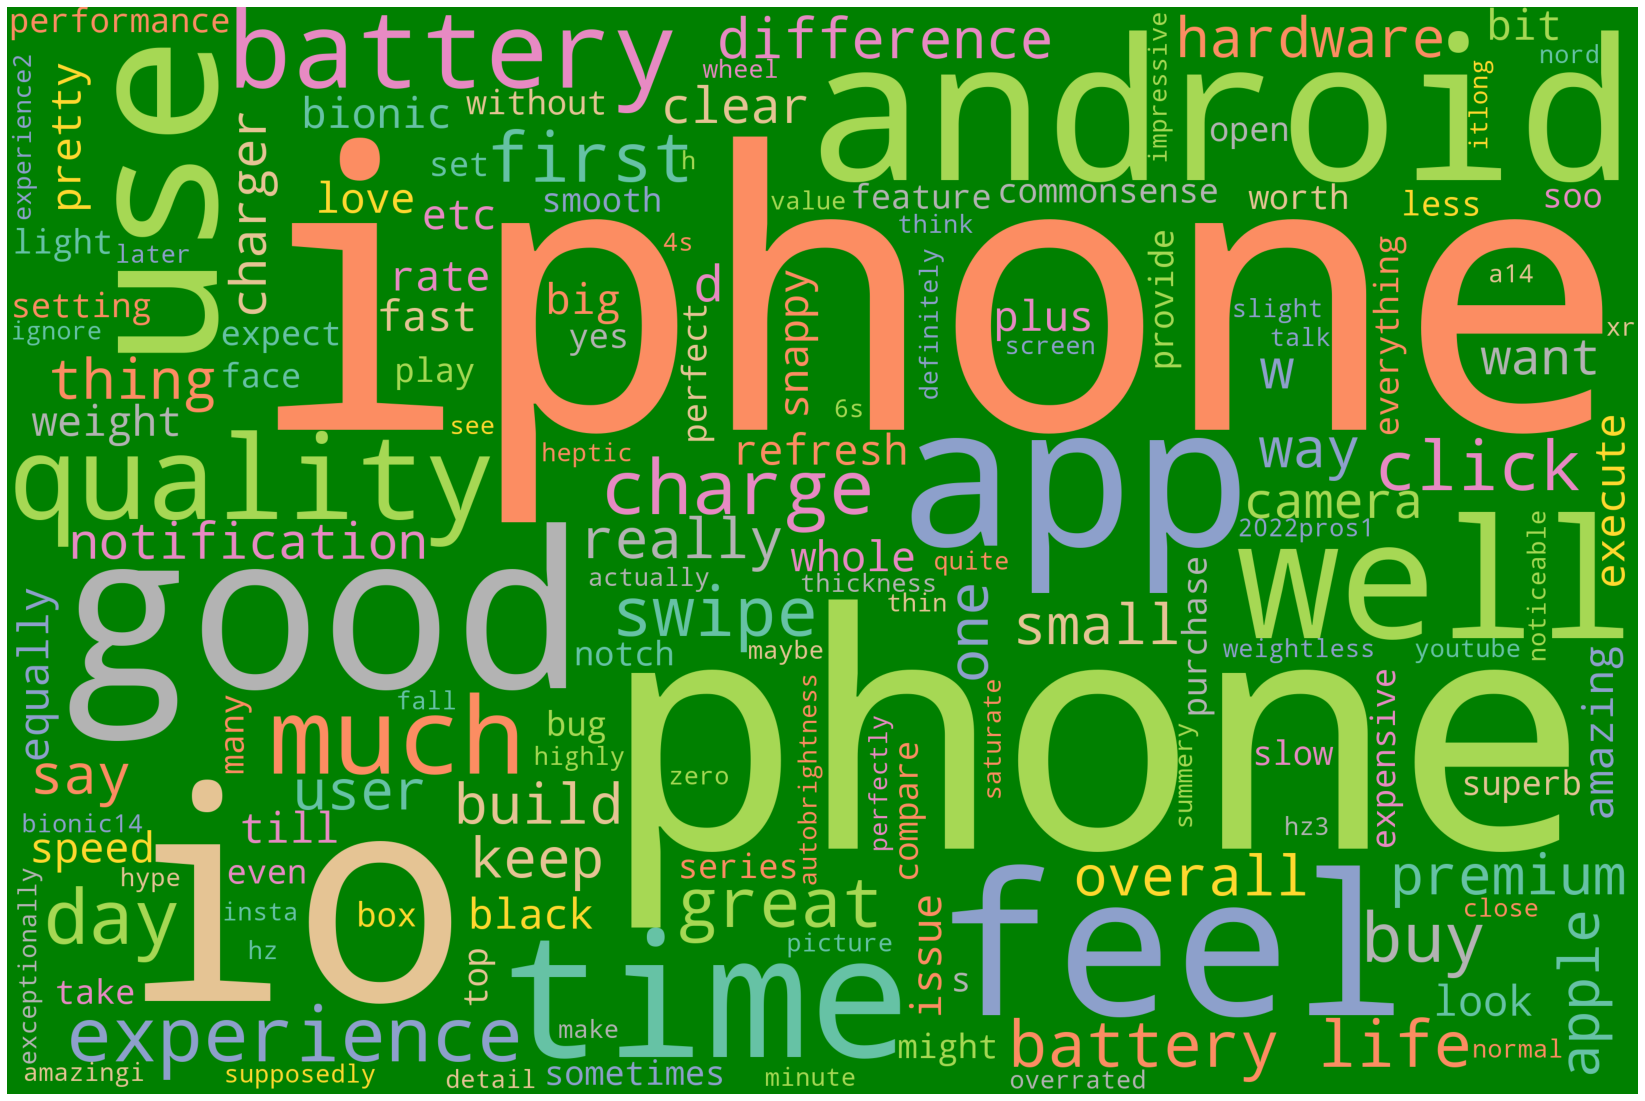

In [80]:
plotcloud(wordcloud)

In [82]:
nlp=spacy.load('en_core_web_sm')
one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [83]:
for token in doc_block[100:250]:
  print(token,token.pos_)

pretty ADV
overrated ADJ
iphone NOUN
be AUX
not PART
exceptionally ADV
fast ADV
normal ADJ
app NOUN
like ADP
youtube NOUN
insta NOUN
etc X
android NOUN
phone NOUN
equally ADV
snappy ADJ
2022pros1 NUM
impressive ADJ
hardware NOUN
heptic NOUN
autobrightness NOUN
otherwise ADV
highly ADV
ignore VERB
thing NOUN
android ADJ
way NOUN
perfectly ADV
execute VERB
iphone NOUN
do AUX
make VERB
big ADJ
difference NOUN
user NOUN
experience2 NOUN
the DET
screen NOUN
amazing ADJ
do AUX
not PART
90 NUM
120 NUM
hz PROPN
refresh ADJ
rate NOUN
feel VERB
well INTJ
nord PROPN
90 NUM
hz3 NOUN
a14 NOUN
bionic ADJ
promise NOUN
year NOUN
performance NOUN
ahead4 NOUN
battery NOUN
life NOUN
somewhere ADV
good ADJ
great56 NOUN
the DET
dimension NOUN
phone NOUN
small ADJ
usual ADJ
android ADJ
phone NOUN
feel VERB
much ADV
handy ADJ
along ADV
less ADV
weight7 NOUN
overall ADJ
build NOUN
quality NOUN
great8 NOUN
good ADJ
audio ADJ
output NOUN
there9 NOUN
long ADJ
term NOUN
supportcons1 NOUN
slow ADJ
charge NOUN
20 N

In [84]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['w', 'charge', 'charge', 'effect', 'health', 'battery', 'way', 'way', 'company', 'create', 'battery', 'withstand', 'charge', 'use', 'charging', 'keep', 'exhagerate', 'software', 'experience', 'reality', 'android', 'user', 'commonsense', 'option', 'setting', 'step', 'thing', 'io', 'look', 'engineer', 'apple', 'do', 'job', 's', 'notification', 'group', 'manner', 'execute', 'customisation', 'commonsense', 'thing', 'miss', 'day', 'android', 'click', 'swipe', 'take', 'swipe', 'click', 'sooooo', 'want', 'notification', 'swipe', 'click', 'want', 'notification', 'swipe', 'click', 'believe', 'apple', 'scream', 'speed', 'android', 'phone', 'performance', 'today', 'split', 'app', 'loading', 'time', 'io', 'android', 'io', 'have', 'bug', 'app', 'take', 'time', 'etc4', 'reader', 'seem', 'atleast', 's', 'missing5', 'accessories6', 'battery', 'life', 'greatin', 'end', 'say', 'iphone', 'provide', 'experience', 'hardware', 'know', 'buy', 'valueformoney', 'phone', 'buy', 'afford']


In [85]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,iphone,20
1,phone,14
2,battery,8
3,feel,8
4,app,8
5,use,7
6,io,7
7,time,6
8,android,6
9,quality,6


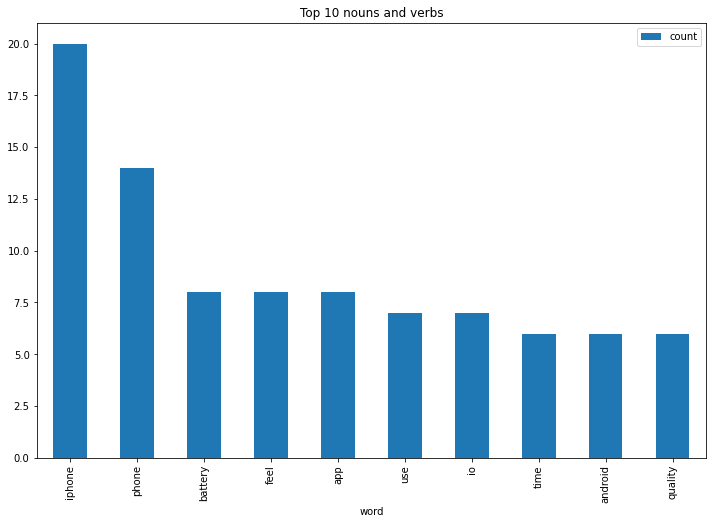

In [86]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [90]:
from nltk import tokenize
sentence=tokenize.sent_tokenize(' '.join(reviews))
sentence

['Phones been amazingI have used iphone 4s , 5 , 6s and xr but I liked it.Long battery life, not quite as good as iPhone 13 but Close.',
 'Plus I didn’t like the weight and thickness of iPhone 13  just to get maybe 45-60 minutes more time at the most.',
 'I don’t see any difference in speed between Bionic14 and Bionic 15 what so ever.',
 'And to much hype for the 120 h refresh rate, no noticeable difference at all.',
 'Also I actually think iPhone 12 pictures look better than iPhone 13 because by supposedly having slight bit more detail they over saturate the black in them.',
 'Love the thin weightless feel in iPhone 12 and have had zero issues.',
 'I’m keeping this phone till the wheels fall off.',
 'Great value.',
 'SUMMERY: As a first time iPhone user, I would say one should definitely buy iPhone ONLY for premium built & premium hardware (will talk later) while the whole iOS experience is pretty overrated.',
 "iPhones isn't any exceptionally fast with normal apps like YouTube, Insta

In [92]:
sentence_df=pd.DataFrame(sentence,columns=['Sentence'])
sentence_df

,Sentence
0,"Phones been amazingI have used iphone 4s , 5 ,..."
1,Plus I didn’t like the weight and thickness of...
2,I don’t see any difference in speed between Bi...
3,"And to much hype for the 120 h refresh rate, n..."
4,Also I actually think iPhone 12 pictures look ...
...,...
59,"Switched to IOS for the first time, was really..."
60,Always check the number.Phone condition is good.
61,No bubble wrap or card board boxwas provided.
62,It also help me to identify the box over the p...


In [98]:
afin=pd.read_csv('Afinn.csv',sep=',',encoding='latin-1')
afin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [101]:
afin_scores=afin.set_index('word')['value'].to_dict()
afin_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [103]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=afin_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [105]:
calculate_sentiment(text='good service')

3

In [109]:
sentence_df['sentiment_value']=sentence_df['Sentence'].apply(calculate_sentiment)
sentence_df

,Sentence,sentiment_value
0,"Phones been amazingI have used iphone 4s , 5 ,...",5
1,Plus I didn’t like the weight and thickness of...,2
2,I don’t see any difference in speed between Bi...,0
3,"And to much hype for the 120 h refresh rate, n...",-1
4,Also I actually think iPhone 12 pictures look ...,0
...,...,...
59,"Switched to IOS for the first time, was really...",32
60,Always check the number.Phone condition is good.,3
61,No bubble wrap or card board boxwas provided.,-1
62,It also help me to identify the box over the p...,2


In [111]:
sentence_df['word_count']=sentence_df['Sentence'].str.split().apply(len)
sentence_df['word_count']

0      28
1      22
2      15
3      15
4      27
     ... 
59    144
60      7
61      8
62     13
63     23
Name: word_count, Length: 64, dtype: int64

In [114]:
sentence_df.sort_values(by='sentiment_value')

,Sentence,sentiment_value,word_count
22,iOS looks pretty yes but UX engineers at Apple...,-5,49
58,"However, this is not bad, either.",-3,6
46,Iphone 12 is slightly lighter in weight.I even...,-3,19
28,DON'T believe Apple fanboys who scream about s...,-2,16
23,Everything you can do in Android with a single...,-2,26
...,...,...,...
33,Battery life is above good but not great.In th...,6,28
10,"Impressive hardware, the heptics, the autobrig...",6,30
49,Overall experience 5/5 With soo many innovatio...,10,28
63,Good looking.Camera_ for me it's awesome till ...,11,23


In [115]:
sentence_df['sentiment_value'].describe()

count    64.000000
mean      1.937500
std       4.662839
min      -5.000000
25%       0.000000
50%       1.000000
75%       3.000000
max      32.000000
Name: sentiment_value, dtype: float64

In [116]:
sentence_df[sentence_df['sentiment_value']<=0]

,Sentence,sentiment_value,word_count
2,I don’t see any difference in speed between Bi...,0,15
3,"And to much hype for the 120 h refresh rate, n...",-1,15
4,Also I actually think iPhone 12 pictures look ...,0,27
6,I’m keeping this phone till the wheels fall off.,0,9
14,"The dimensions of phone, it's smaller than usu...",0,19
15,Overall build quality is great.8.,0,5
18,SLOW CHARGING.,0,2
19,"20 W only, you'll be jealous of 1/3rd price ph...",-2,14
22,iOS looks pretty yes but UX engineers at Apple...,-5,49
23,Everything you can do in Android with a single...,-2,26


In [117]:
sentence_df[sentence_df['sentiment_value']>0]

,Sentence,sentiment_value,word_count
0,"Phones been amazingI have used iphone 4s , 5 ,...",5,28
1,Plus I didn’t like the weight and thickness of...,2,22
5,Love the thin weightless feel in iPhone 12 and...,3,13
7,Great value.,3,2
8,"SUMMERY: As a first time iPhone user, I would ...",1,33
9,iPhones isn't any exceptionally fast with norm...,2,21
10,"Impressive hardware, the heptics, the autobrig...",6,30
11,The screen is AMAZING.. it doesn't have 90 or ...,4,23
12,A14 bionic promises years of performance ahead.4.,1,7
13,Battery life is somewhere in between good & gr...,3,9


In [120]:
sentence_df['index']=range(0,len(sentence_df))
sentence_df

,Sentence,sentiment_value,word_count,index
0,"Phones been amazingI have used iphone 4s , 5 ,...",5,28,0
1,Plus I didn’t like the weight and thickness of...,2,22,1
2,I don’t see any difference in speed between Bi...,0,15,2
3,"And to much hype for the 120 h refresh rate, n...",-1,15,3
4,Also I actually think iPhone 12 pictures look ...,0,27,4
...,...,...,...,...
59,"Switched to IOS for the first time, was really...",32,144,59
60,Always check the number.Phone condition is good.,3,7,60
61,No bubble wrap or card board boxwas provided.,-1,8,61
62,It also help me to identify the box over the p...,2,13,62


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


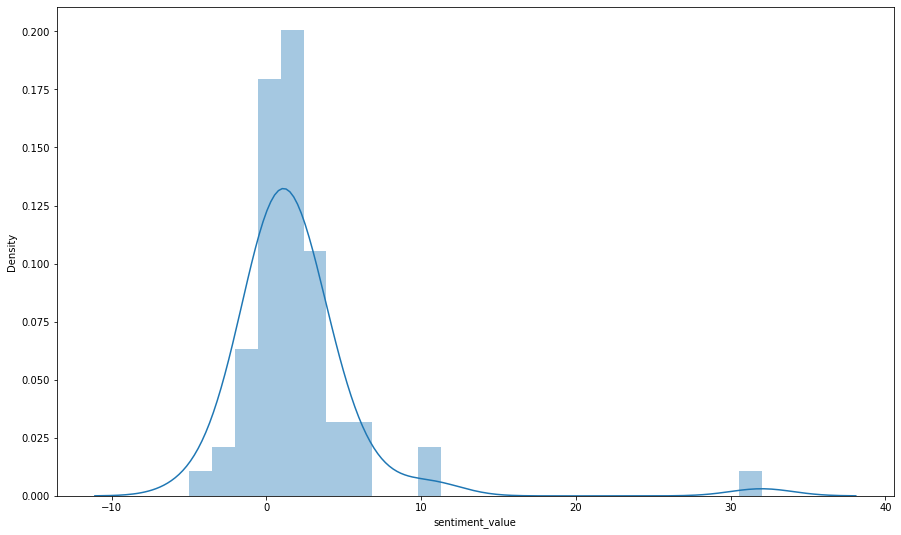

In [121]:
import seaborn as sn
plt.figure(figsize=(15,9))
sn.distplot(sentence_df['sentiment_value'])

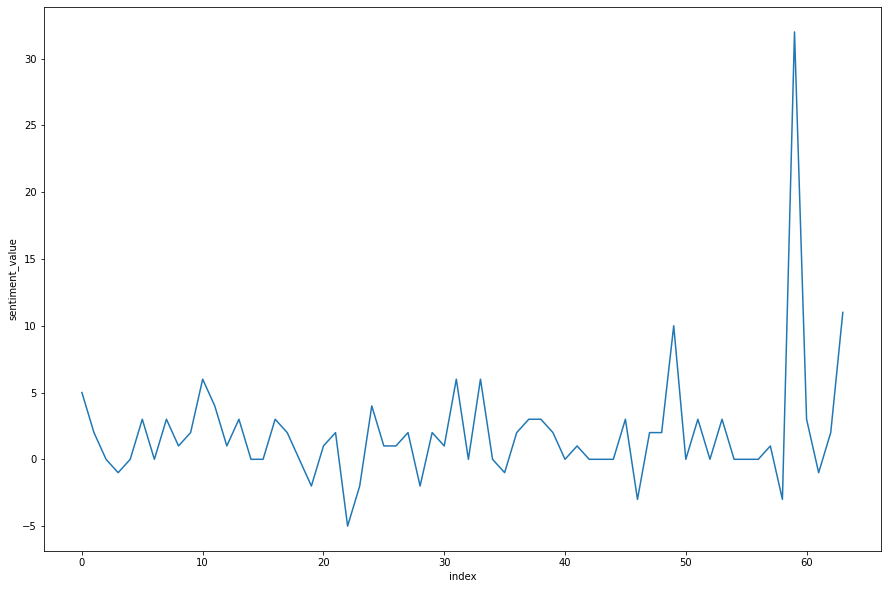

In [122]:
plt.figure(figsize=(15,10))
sn.lineplot(x='index',y='sentiment_value',data=sentence_df)